In [1]:
# Sosyal Medya Kullanımı ve Ruh Sağlığı Analizi

## 1. Giriş
Bu çalışma, sosyal medya kullanımı ile ruh sağlığı arasındaki ilişkiyi incelemektedir. Veri setinde kullanıcıların günlük ekran süresi, uyku kalitesi, stres seviyeleri, egzersiz sıklığı ve 
mutluluk endeksi gibi bilgiler yer almaktadır. Amaç , dijital alışkanlıkların ve yaşam tarzı faktörlerinin genel sağlık ve duygusal denge üzerindeki etkilerini anlamaktır.

---

## 2. Veri Seti Hakkında
- Veri kaynağı:[Kaggle - Sosyal Medya ve Ruh Sağlığı Veri Seti](https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance)
- Özellikler:
  - **Ekran Süresi (saat/gün)**: Kullanıcının günlük sosyal medya kullanımı
  - **Uyku Kalitesi**:          1-10 ölçeğinde
  - **Stres Seviyesi**:         1-10 ölçeğinde
  - **Egzersiz Sıklığı**:       Haftalık gün sayısı
  - **Mutluluk Endeksi**:       1-10 ölçeğinde

```python


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../Social_Media/Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [4]:
# Eksik veri kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [5]:
df.describe(include='all')

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
count,500,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000
unique,500,NaN,3,NaN,NaN,NaN,NaN,NaN,6,NaN
top,U500,NaN,Male,NaN,NaN,NaN,NaN,NaN,TikTok,NaN
freq,1,NaN,248,NaN,NaN,NaN,NaN,NaN,95,NaN
mean,NaN,32.988000,NaN,5.530000,6.304000,6.618000,3.134000,2.448000,NaN,8.376000
std,NaN,9.960637,NaN,1.734877,1.529792,1.542996,1.858751,1.428067,NaN,1.524228
min,NaN,16.000000,NaN,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,4.000000
25%,NaN,24.000000,NaN,4.300000,5.000000,6.000000,2.000000,1.000000,NaN,7.000000
50%,NaN,34.000000,NaN,5.600000,6.000000,7.000000,3.000000,2.000000,NaN,9.000000
75%,NaN,41.000000,NaN,6.700000,7.000000,8.000000,5.000000,3.000000,NaN,10.000000


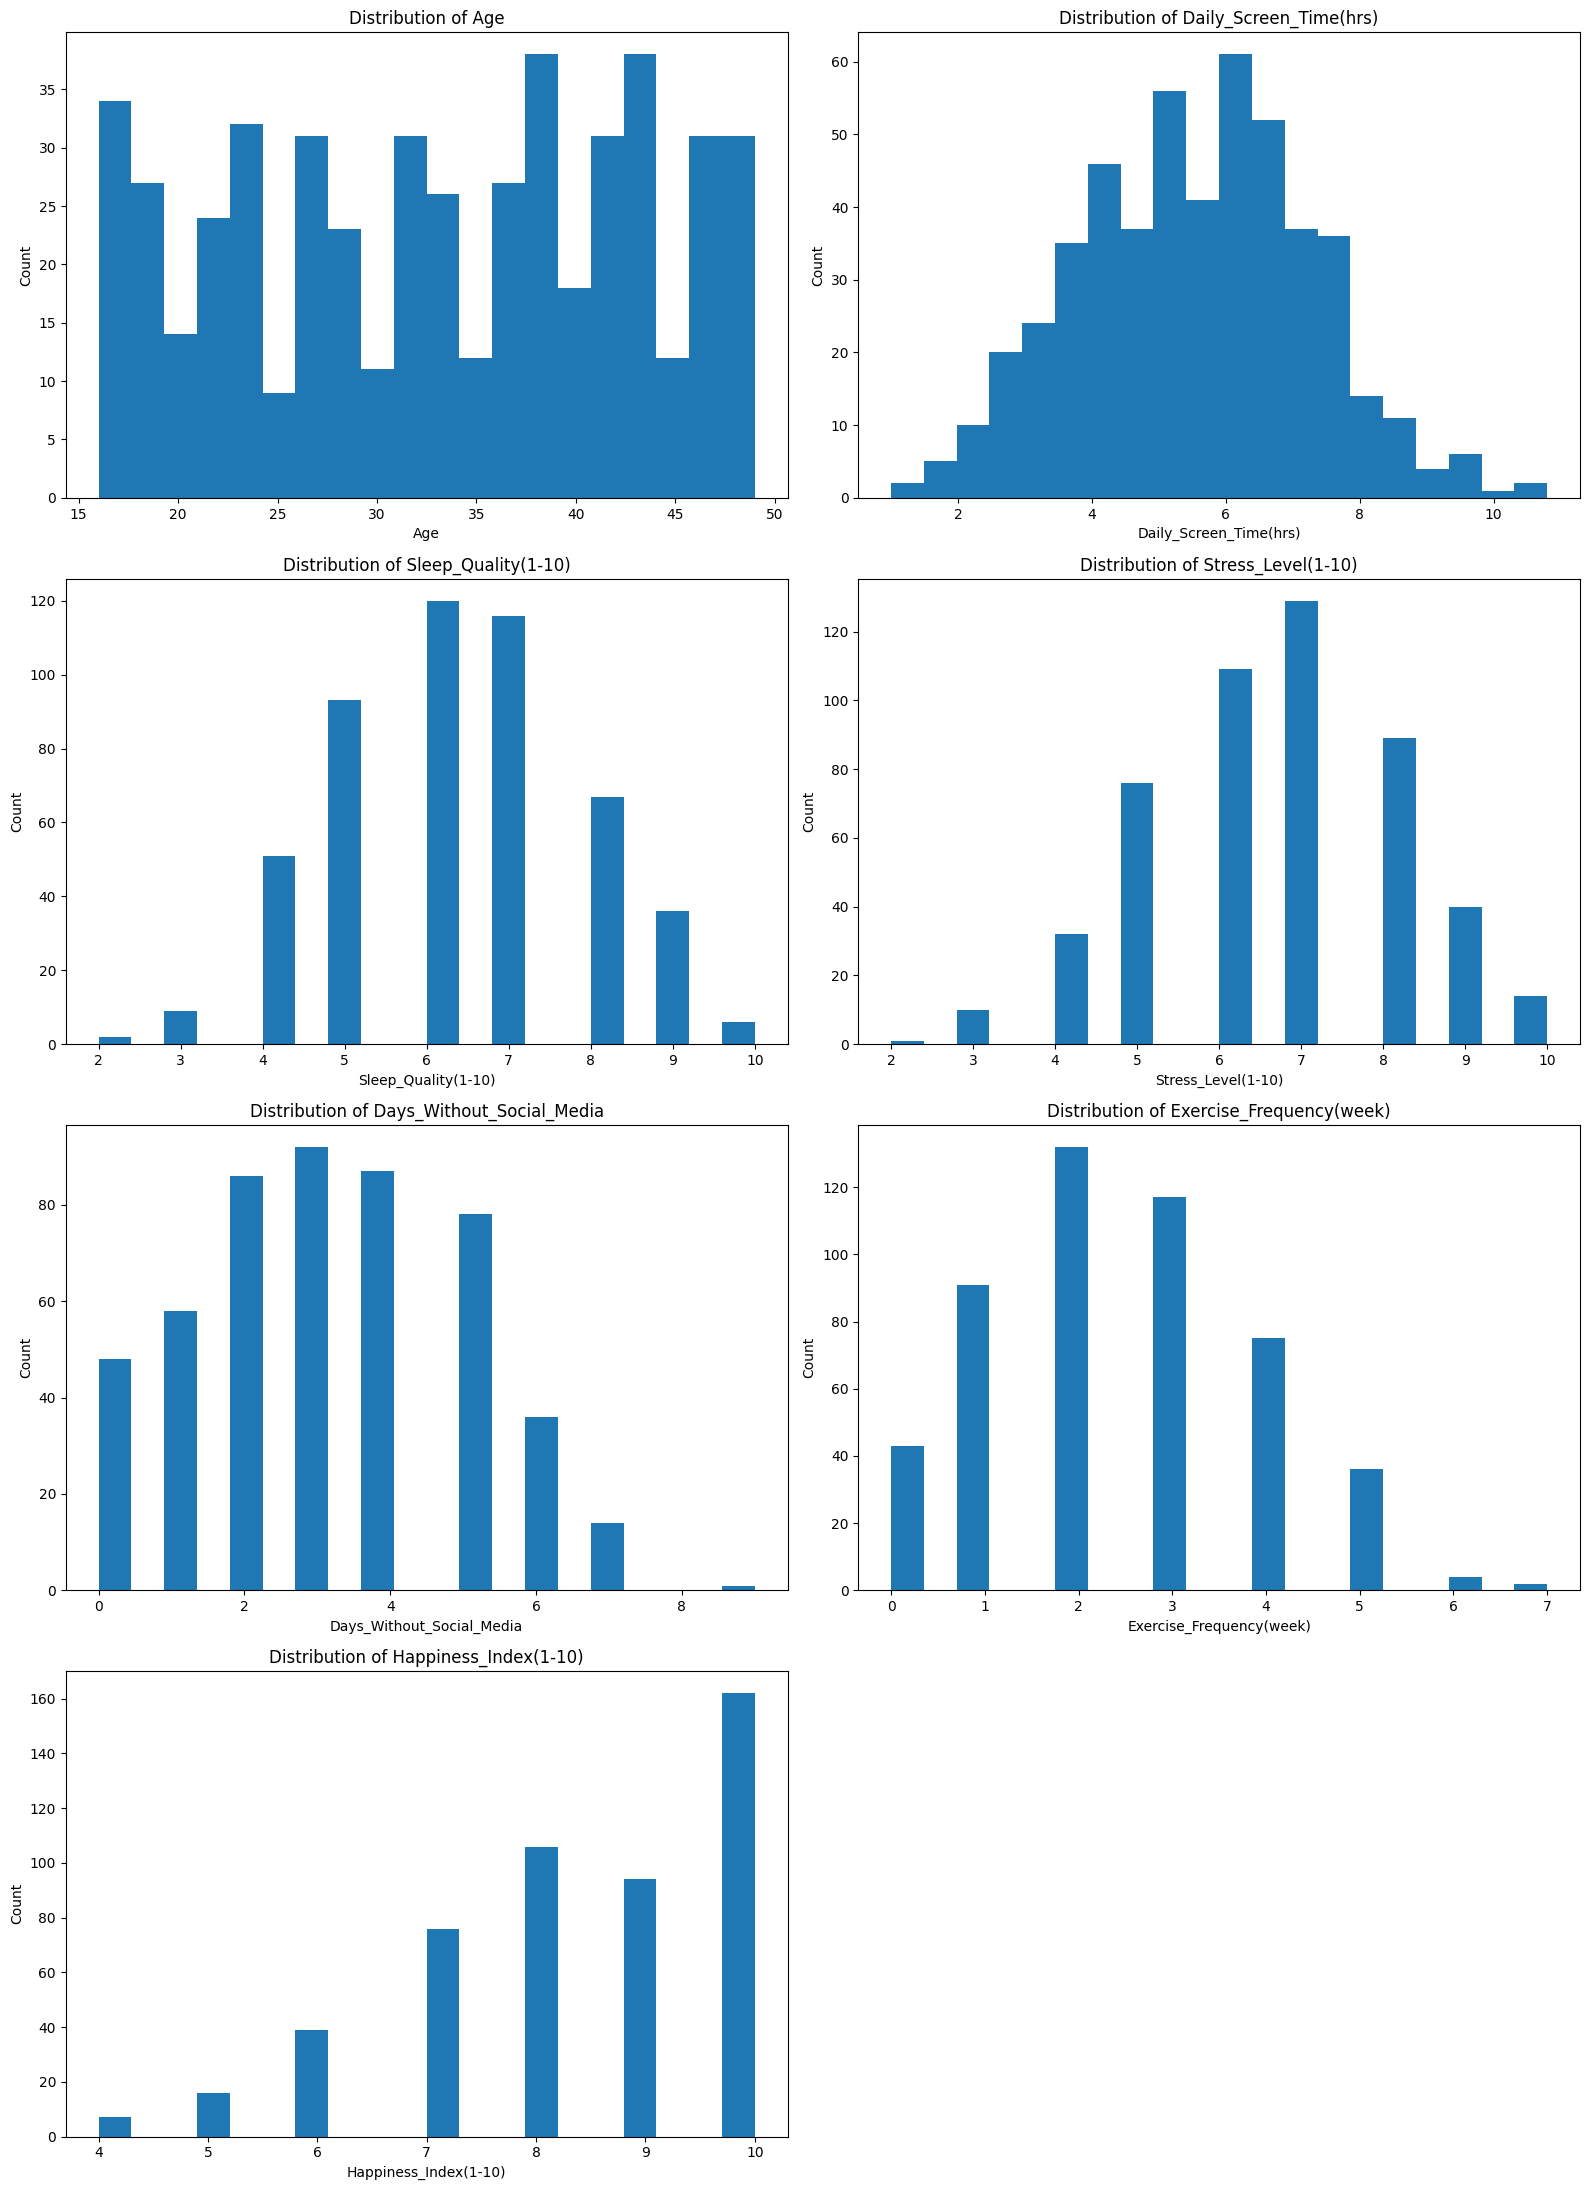

In [6]:
numeric_cols = [
    "Age", "Daily_Screen_Time(hrs)",
    "Sleep_Quality(1-10)", "Stress_Level(1-10)",
    "Days_Without_Social_Media", "Exercise_Frequency(week)",
    "Happiness_Index(1-10)"
]

plt.figure(figsize=(16, 22))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


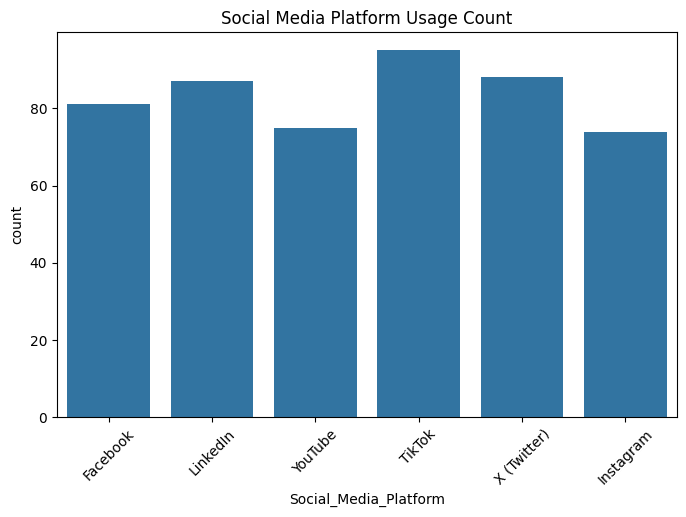

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Social_Media_Platform")
plt.title("Social Media Platform Usage Count")
plt.xticks(rotation=45)
plt.show()


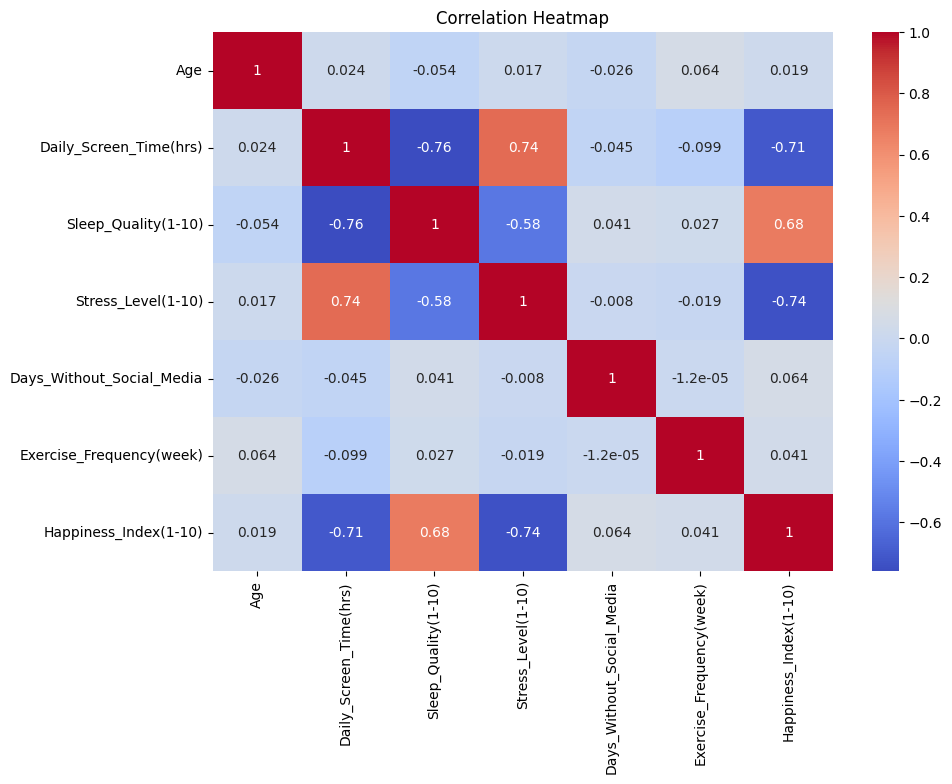

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # sadece sayısal kolonlar

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


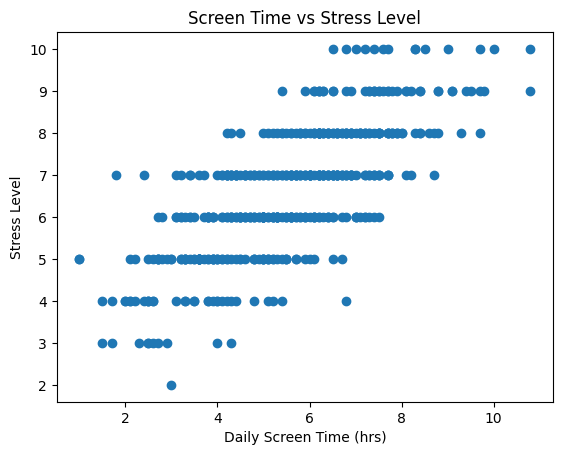

In [10]:
plt.scatter(df["Daily_Screen_Time(hrs)"], df["Stress_Level(1-10)"])
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Stress Level")
plt.title("Screen Time vs Stress Level")
plt.show()


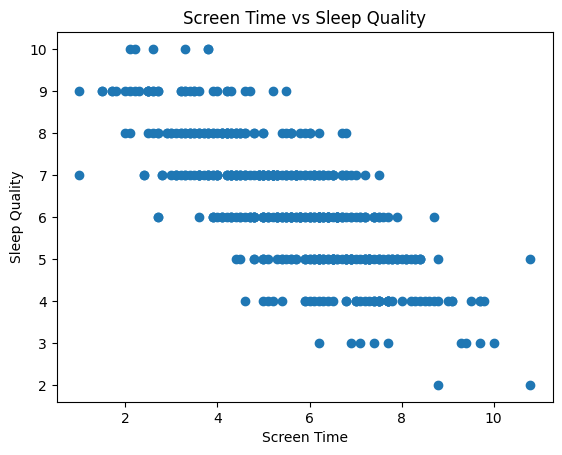

In [11]:
plt.scatter(df["Daily_Screen_Time(hrs)"], df["Sleep_Quality(1-10)"])
plt.xlabel("Screen Time")
plt.ylabel("Sleep Quality")
plt.title("Screen Time vs Sleep Quality")
plt.show()


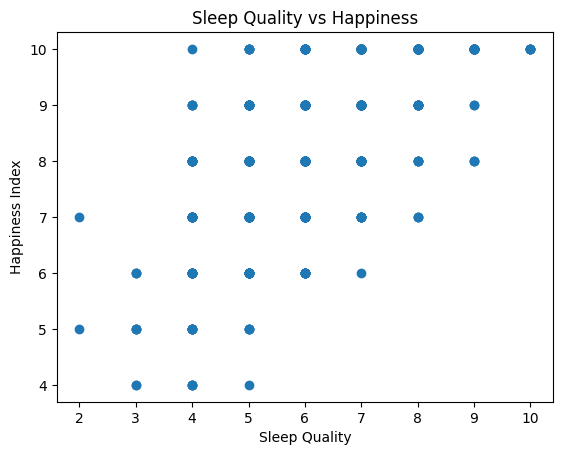

In [12]:
plt.scatter(df["Sleep_Quality(1-10)"], df["Happiness_Index(1-10)"])
plt.xlabel("Sleep Quality")
plt.ylabel("Happiness Index")
plt.title("Sleep Quality vs Happiness")
plt.show()


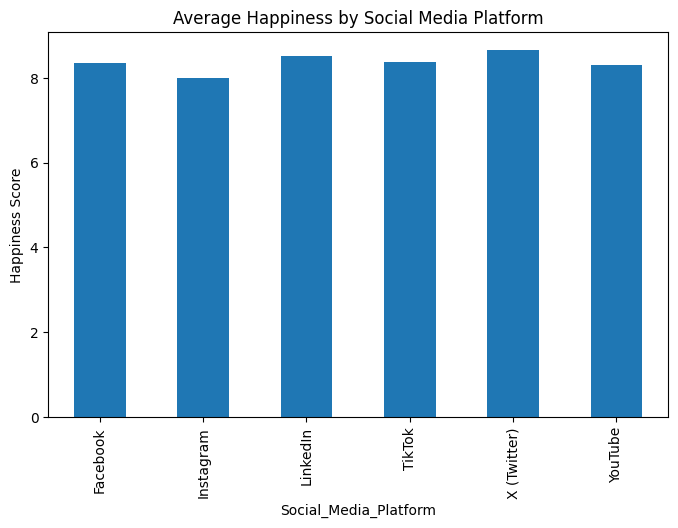

In [13]:
df.groupby("Social_Media_Platform")["Happiness_Index(1-10)"].mean().plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Average Happiness by Social Media Platform")
plt.ylabel("Happiness Score")
plt.show()


In [ ]:
Sonuçlar ve Yorumlar

Yüksek sosyal medya kullanım süresi, uyku kalitesini olumsuz etkiliyor ve stres seviyelerini artırıyor.

Düzenli egzersiz yapan katılımcılar daha yüksek mutluluk endeksi gösteriyor.

Bu bulgular, dijital alışkanlıkların ve yaşam tarzı faktörlerinin genel sağlık ve duygusal dengeyi etkileyebileceğini göstermektedir.

 Öneriler

Sosyal medya kullanımını sınırlamak

Düzenli uyku ve egzersiz alışkanlıkları oluşturmak

Stres yönetimi için farkındalık tekniklerini uygulamak    